# Time series data and forecasting

components
- trend
- seasonality
- cyclical 
- random

Models/ forecasting techniques
- AR
- MA
- ARMA
- ARIMA

In [ ]:
time series data -> random variable
- single variable (demand of the product at time t) univariate time series data
- multivariate time series data -> 

4 components
- trend
- seasonal
- cyclical
- irregular

## Moving Average


In [2]:
import pandas as pd

df = pd.read_csv('wsb.csv')

df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

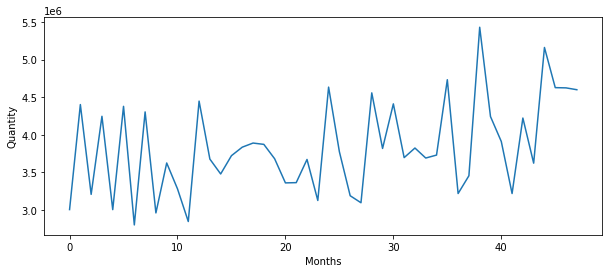

In [4]:
plt.figure(figsize=(10,4))

plt.xlabel("Months")
plt.ylabel("Quantity")

plt.plot(df['Sale Quantity'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [6]:
df['moving_avg_12'] = df['Sale Quantity'].rolling(window=12).mean().shift(1)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df[['Sale Quantity', 'moving_avg_12']]

,Sale Quantity,moving_avg_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


In [8]:
df[['Sale Quantity', 'moving_avg_12']][36:]

,Sale Quantity,moving_avg_12
36,3216483,3928410.33
37,3453239,3810280.00
38,5431651,3783643.33
39,4241851,3970688.42
40,3909887,4066369.08
41,3216438,4012412.75
42,4222005,3962369.58
43,3621034,3946629.42
44,5162201,3940489.50
45,4627177,4052117.17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


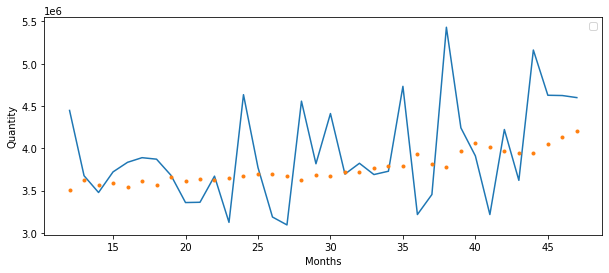

In [9]:
plt.figure(figsize=(10,4))

plt.xlabel('Months')
plt.ylabel('Quantity')

plt.plot(df['Sale Quantity'][12:])
plt.plot(df['moving_avg_12'][12:], '.')

plt.legend()

In [10]:
# there is an increasing trend in sales quantity over the months

## Forecast Accurary

In [ ]:
- RMSE
- MAPE

### Mean Absolute Percentage Error

In [11]:
import numpy as np

In [13]:
def get_MAPE(actual, predicted):
    ytrue, ypred = np.array(actual), np.array(predicted)
    
    return np.round(np.mean(np.abs((actual - predicted) / actual))*100, 2)

In [14]:
get_MAPE(df['Sale Quantity'][36:].values, df['moving_avg_12'][36:].values)

14.04

In [15]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(df['Sale Quantity'][36:].values,
                           df['moving_avg_12'][36:].values))

734725.8359239782

## Exponential Smoothing

In [16]:
df['ewm'] = df['Sale Quantity'].ewm(alpha=0.2).mean()

In [18]:
pd.options.display.float_format = '{:.2f}'.format

In [19]:
df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,moving_avg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [20]:
get_MAPE(df[['Sale Quantity']][36:].values,
        df[['ewm']][36:].values)

11.15

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


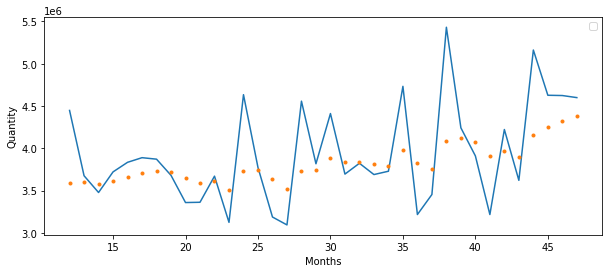

In [21]:
plt.figure(figsize=(10,4))

plt.xlabel('Months')
plt.ylabel('Quantity')

plt.plot(df['Sale Quantity'][12:])
plt.plot(df['ewm'][12:], '.')

plt.legend()

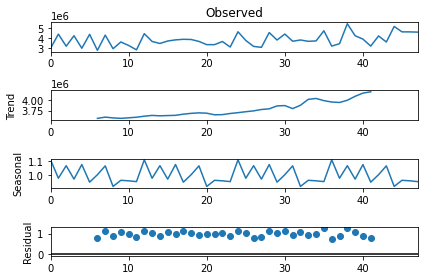

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(df['Sale Quantity']),
                                 model='multiplicative',
                                 period = 12)

ts_plot = ts_decompose.plot()

df['seasonal'] = ts_decompose.seasonal
df['trend'] = ts_decompose.trend